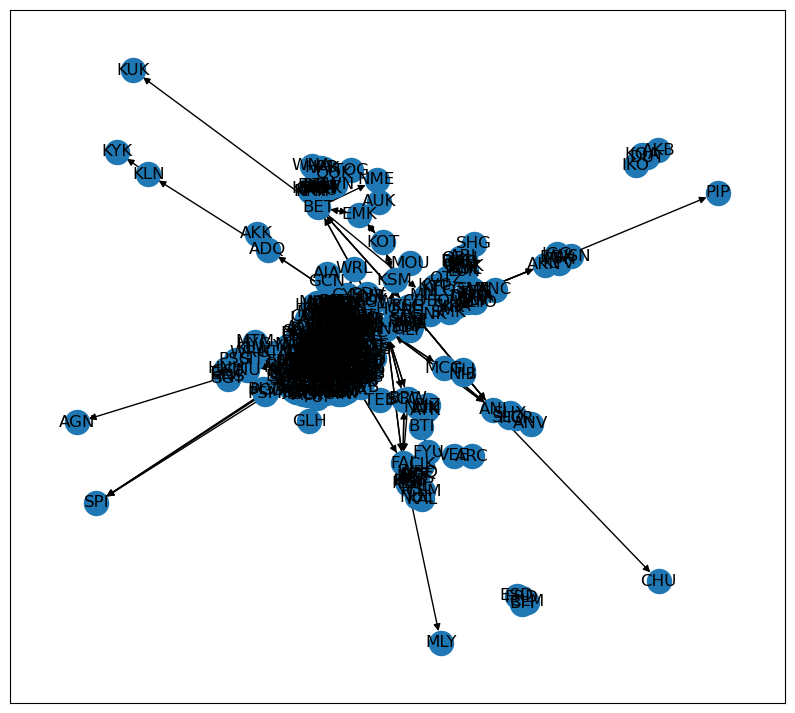

/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/1353563228.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/1353563228.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)


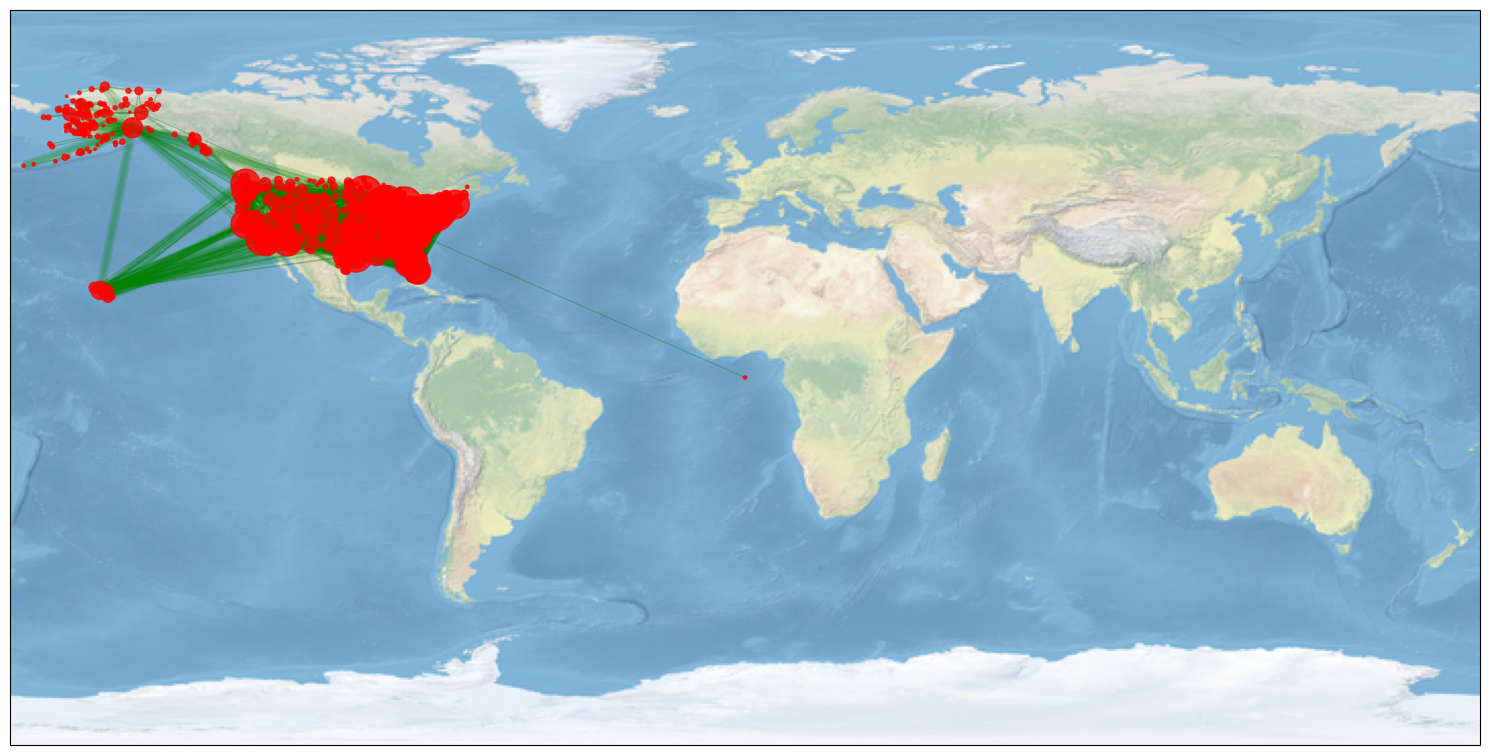

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

if __name__ == "__main__":
    # download airport info data
    airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Lon', 'Alt', 
                   'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
    airport_df = pd.read_csv("data/airports_usa.dat", names=airport_col, index_col=0)

    # download flight routes data
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
    routes_df = pd.read_csv("data/routes_usa.dat", names=route_cols)

    # clean up data, change 'object' type to numeric and drop NaNs
    routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), errors='coerce')
    routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), errors='coerce')
    routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"])

    airport_us = airport_df[airport_df.Country == "United States"][['Name', 'Lat', 'Lon', 'IATA', 'ICAO']]
    us_airport_ix = airport_us.index.values
    routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                          (routes_df['Dest Airport ID'].isin(us_airport_ix))]
    routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

    # to find number of flights in and out of an airport #change append into pd.concat
    counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
    counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
    pos_data = counts.merge(airport_us, on='IATA')

    ##### Part 1: simple network visualization, Alaska and other non-mainland territories included ####

    # Create graph
    graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                    edge_attr='counts', create_using=nx.DiGraph())

    # Default graph using NetworkX built-in graph tools
    plt.figure(figsize=(10, 9))
    nx.draw_networkx(graph)
    plt.savefig("map_0.png", format="png", dpi=300)
    plt.show()

    ##### Part 2: Map visualization with Cartopy ####
    plt.figure(figsize=(15, 20))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.stock_img()

    node_list = list(graph.nodes)
    coordinates = np.zeros((len(node_list), 2))

    for ix in range(len(node_list)):
        if node_list[ix] not in list(airport_df.IATA):
            continue
        else:
            Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
            Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)
            coordinates[ix, :] = [Lon_ix, Lat_ix]

    positions = dict(zip(graph.nodes, list(coordinates)))

    # Draw nodes and edges and overlay on the map
    node_size = [counts[counts['IATA'] == s]['total_flight'].values[0] * 3 for s in graph.nodes]
    nx.draw_networkx_nodes(G=graph, pos=positions, ax=ax, node_color='r', alpha=0.8, node_size=node_size)
    nx.draw_networkx_edges(G=graph, pos=positions, edge_color='g', width=[routes_us[routes_us['Source Airport'] == s]['counts'].values[0] * 0.75 for s in routes_us['Source Airport']], alpha=0.2, arrows=False)

    plt.tight_layout()
    plt.savefig("map_1.png", format="png", dpi=300)
    plt.show()


/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/3661215064.py:58: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/3661215064.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)


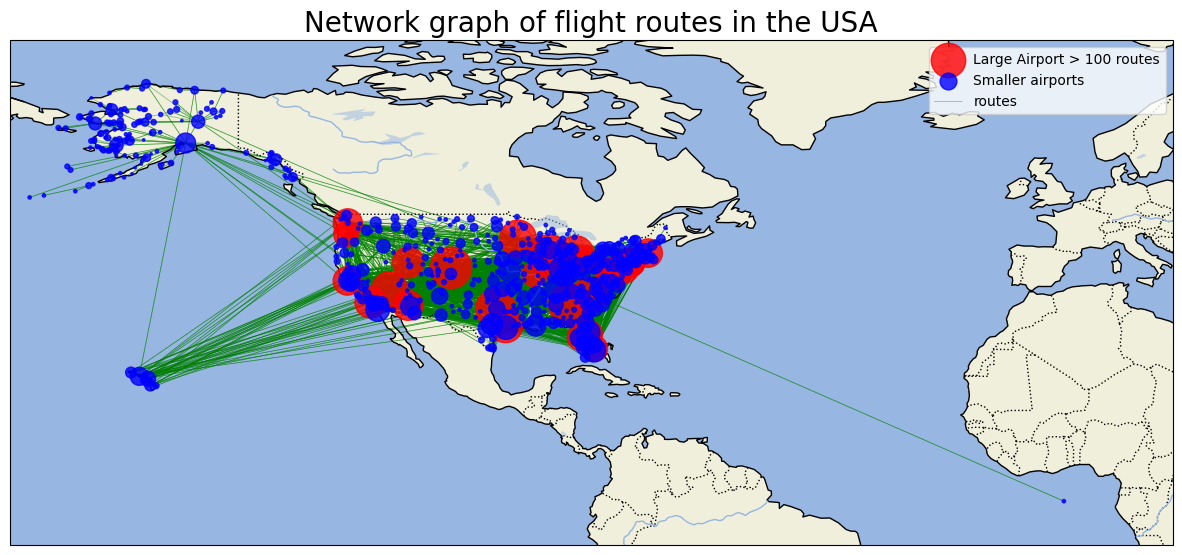

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

if __name__ == "__main__":
    # Download airport info data
    airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Lon', 'Alt', 
                   'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
    airport_df = pd.read_csv("data/airports_usa.dat", names=airport_col, index_col=0)

    # Download flight routes data
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
    routes_df = pd.read_csv("data/routes_usa.dat", names=route_cols)

    # Clean up data, change 'object' type to numeric and drop NaNs
    routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), errors='coerce')
    routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), errors='coerce')
    routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"])

    airport_us = airport_df[airport_df.Country == "United States"][['Name', 'Lat', 'Lon', 'IATA', 'ICAO']]
    us_airport_ix = airport_us.index.values
    routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                          (routes_df['Dest Airport ID'].isin(us_airport_ix))]
    routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

    # To find number of flights in and out of an airport
    counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
    counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
    pos_data = counts.merge(airport_us, on='IATA')

    # Create graph
    graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                    edge_attr='counts', create_using=nx.DiGraph())

    plt.figure(figsize=(15, 20))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    node_list = list(graph.nodes)
    coordinates = np.zeros((len(node_list), 2))

    for ix in range(len(node_list)):
        if node_list[ix] not in list(airport_df.IATA):
            continue
        else:
            Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
            Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)
            coordinates[ix, :] = [Lon_ix, Lat_ix]

    positions = dict(zip(graph.nodes, list(coordinates)))

    # Draw nodes and edges and overlay on the map
    large_airports = counts[counts['total_flight'] > 100]
    small_airports = counts[counts['total_flight'] <= 100]

    large_airport_nodes = large_airports['IATA'].tolist()
    small_airport_nodes = small_airports['IATA'].tolist()

    large_airport_sizes = [large_airports[large_airports['IATA'] == s]['total_flight'].values[0] * 3 for s in large_airport_nodes]
    small_airport_sizes = [small_airports[small_airports['IATA'] == s]['total_flight'].values[0] * 3 for s in small_airport_nodes]

    nx.draw_networkx_nodes(G=graph, pos=positions, ax=ax, nodelist=large_airport_nodes, node_color='r', alpha=0.8, node_size=large_airport_sizes, label='Large Airport > 100 routes')
    nx.draw_networkx_nodes(G=graph, pos=positions, ax=ax, nodelist=small_airport_nodes, node_color='b', alpha=0.8, node_size=small_airport_sizes, label='Smaller airports')
    nx.draw_networkx_edges(G=graph, pos=positions, ax=ax, edge_color='g', width=0.5, alpha=0.5, arrows=False, label='routes')

    plt.title("Network graph of flight routes in the USA", fontsize=20)
    plt.legend(scatterpoints=1)
    plt.savefig("map_2.png", format="png", dpi=300)
    plt.show()


/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/556182907.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_56746/556182907.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)


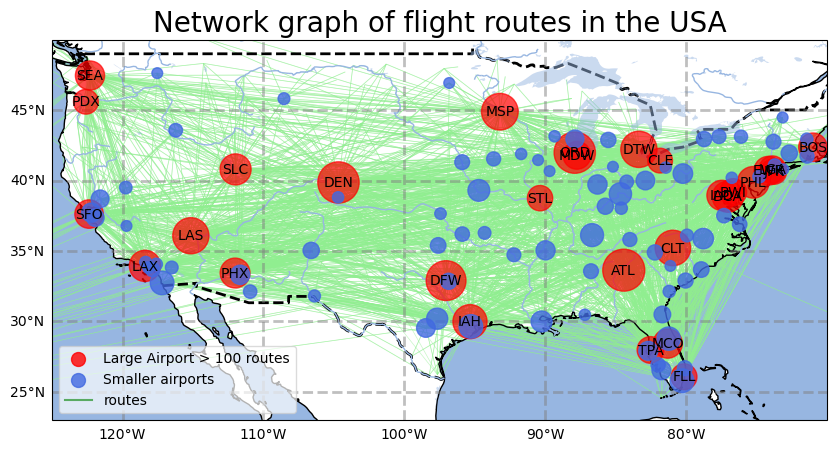

In [63]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

if __name__ == "__main__":
    # 下载机场信息数据
    airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Lon', 'Alt', 
                   'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
    airport_df = pd.read_csv("data/airports_usa.dat", names=airport_col, index_col=0)

    # 下载航班路线数据
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
    routes_df = pd.read_csv("data/routes_usa.dat", names=route_cols)

    # 数据清洗
    routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), errors='coerce')
    routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), errors='coerce')
    routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"])

    airport_us = airport_df[airport_df.Country == "United States"][['Name', 'Lat', 'Lon', 'IATA', 'ICAO']]
    us_airport_ix = airport_us.index.values
    routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                          (routes_df['Dest Airport ID'].isin(us_airport_ix))]
    routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

    # 计算航班总数
    counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
    counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
    pos_data = counts.merge(airport_us, on='IATA')

    
    # 创建图
    graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                    edge_attr='counts', create_using=nx.DiGraph())

    # 设置地图和坐标轴
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    #ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--',lw=2)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # 添加坐标轴
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    node_list = list(graph.nodes)
    coordinates = np.zeros((len(node_list), 2))

    for ix in range(len(node_list)):
        if node_list[ix] not in list(airport_df.IATA):
            continue
        else:
            Lat_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lat)
            Lon_ix = float(airport_df[airport_df.IATA == node_list[ix]].Lon)
            coordinates[ix, :] = [Lon_ix, Lat_ix]

    positions = dict(zip(graph.nodes, list(coordinates)))

    # 分离大机场和小机场
    large_airports = counts[counts['total_flight'] > 100]
    small_airports = counts[(counts['total_flight'] >= 20) & (counts['total_flight'] <= 100)]

    large_airport_nodes = large_airports['IATA'].tolist()
    small_airport_nodes = small_airports['IATA'].tolist()

    large_airport_sizes = [large_airports[large_airports['IATA'] == s]['total_flight'].values[0] * 3 for s in large_airport_nodes]
    small_airport_sizes = [small_airports[small_airports['IATA'] == s]['total_flight'].values[0] * 3 for s in small_airport_nodes]

    # 绘制节点和边
    nx.draw_networkx_nodes(G=graph, pos=positions, ax=ax, nodelist=large_airport_nodes, node_color='r', alpha=0.7, node_size=large_airport_sizes)
    nx.draw_networkx_nodes(G=graph, pos=positions, ax=ax, nodelist=small_airport_nodes, node_color='RoyalBlue', alpha=0.8, node_size=small_airport_sizes)
    nx.draw_networkx_edges(G=graph, pos=positions, ax=ax, edge_color='LightGreen', width=0.5, alpha=0.5, arrows=False)

    nx.draw_networkx_labels(G=graph, pos=positions, ax=ax, labels={node: node for node in large_airport_nodes}, font_size=10, font_color='black')
    plt.title("Network graph of flight routes in the USA", fontsize=20)
    
    # 绘制图例，节点大小一致
    plt.scatter([], [], c='r', alpha=0.8, s=100, label='Large Airport > 100 routes')
    plt.scatter([], [], c='RoyalBlue', alpha=0.8, s=100, label='Smaller airports')
    plt.plot([], [], c='g', linestyle='-',alpha=0.6, lw=1.5, label='routes')
    legend = plt.legend(scatterpoints=1, frameon=True, framealpha=0.7, loc='lower left', fontsize=10)
    
    # 设置地图显示范围 (放大区域)，例如显示美国东海岸部分
    ax.set_extent([-125, -70, 23, 50], crs=ccrs.PlateCarree())

    plt.savefig("usa_flight_routes.png", format="png", dpi=300)
    plt.show()
